## Student details

- Name: Tanaka Mambinge
- Reg number: R223585Q
- Programme: HDS

## Importing libraries

In [132]:
import math
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

## Load data

In [87]:
# create a list of the data from the file
def str_to_int(a):
    if isinstance(a, str):
        a = a.strip()
    return int(a) if a.isdigit() else 0


with open("data/adult.data", "r") as file:
    temp_data = file.read()
    temp_data = temp_data.split("\n")
    temp_data = [r.split(",") for r in temp_data]
    cols_to_convert = [0, 2, 4, 10, 11, 12]
    data = []

    for r in temp_data:
        if len(r) == 15:
            data.append(
                [
                    str_to_int(item) if idx in cols_to_convert else str(item).strip()
                    for idx, item in enumerate(r)
                ]
            )

In [88]:
print(data[1:2])

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K']]


In [89]:
# creating df
cols = [
    "age",
    "type_employer",
    "fnlwgt",
    "education",
    "education_num",
    "marital",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hr_per_week",
    "country",
    "income",
]
df = pd.DataFrame(data, columns=cols)

In [90]:
# the shape attr returns a tuple containing n_rows and n_cols
df.shape

(32561, 15)

In [91]:
counts = df.groupby("country").size()
print(counts.head())

country
?           583
Cambodia     19
Canada      121
China        75
Columbia     59
dtype: int64


In [92]:
df.sex.unique

<bound method Series.unique of 0          Male
1          Male
2          Male
3          Male
4        Female
          ...  
32556    Female
32557      Male
32558    Female
32559      Male
32560    Female
Name: sex, Length: 32561, dtype: object>

In [93]:
df.sex == "Male"

0         True
1         True
2         True
3         True
4        False
         ...  
32556    False
32557     True
32558    False
32559     True
32560    False
Name: sex, Length: 32561, dtype: bool

In [94]:
males_mask = df.sex == "Male"
males = df[males_mask]
males.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


In [95]:
h_income_mask = df.income == ">50K"
h_income_males = df[males_mask & h_income_mask]
h_income_males.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K


In [96]:
females_mask = df.sex == "Female"
females = df[females_mask]
females.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K


In [97]:
h_income_females = df[females_mask & h_income_mask]
females.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K


In [98]:
h_income_earners = df[h_income_mask]
print(
    f"{int(len(h_income_earners) / len(df) * 100)}% of the population are high income earners."
)
print(
    f"{int(len(h_income_males) / len(males) * 100)}% of males are high income earners."
)
print(
    f"{int(len(h_income_females) / len(females) * 100)}% of females are high income earners."
)

24% of the population are high income earners.
30% of males are high income earners.
10% of females are high income earners.


In [99]:
print(f"Average male age is - {males.age.mean()}")
print(f"Average female age is - {females.age.mean()}")
print(f"Average high income male age is - {h_income_males.age.mean()}")
print(f"Average high income female age is - {h_income_females.age.mean()}")

Average male age is - 39.43354749885268
Average female age is - 36.85823043357163
Average high income male age is - 44.62578805163614
Average high income female age is - 42.125530110262936


In [100]:
male_mu, male_var, male_std = (
    males.hr_per_week.mean(),
    males.hr_per_week.var(),
    males.hr_per_week.std(),
)
female_mu, female_var, female_std = (
    females.hr_per_week.mean(),
    females.hr_per_week.var(),
    females.hr_per_week.std(),
)

print(
    "Statistics of hours worked per week for men:\n",
    f"mu: {male_mu}\n",
    f"var: {male_var}\n",
    f"std: {male_std}\n",
)
print(
    "Statistics of hours worked per week for women:\n",
    f"mu: {female_mu}\n",
    f"var: {female_var}\n",
    f"std: {female_std}\n",
)

Statistics of hours worked per week for men:
 mu: 42.42808627810923
 var: 146.88846717140746
 std: 12.11975524387384

Statistics of hours worked per week for women:
 mu: 36.410361154953115
 var: 139.50679700047422
 std: 11.811299547487323



In [101]:
ml_median = males.age.median()
fm_median = females.age.median()
print("Median age per men and women is", ml_median, "and", fm_median)

ml_median_age = h_income_males.age.median()
fm_median_age = h_income_females.age.median()
print(
    "Median age per men and women with high-income is",
    ml_median_age,
    "and",
    fm_median_age,
)

Median age per men and women is 38.0 and 35.0
Median age per men and women with high-income is 44.0 and 41.0


## Data distributions

<AxesSubplot:>

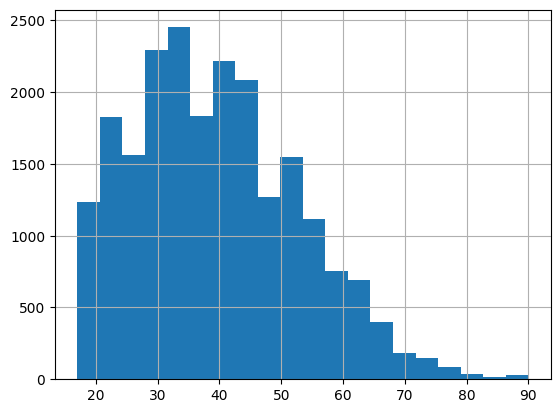

In [102]:
# the normed arg has been deprecated in favor of density
# the hist is positively skewed
males.age.hist(density=0, histtype="stepfilled", bins=20)

<AxesSubplot:>

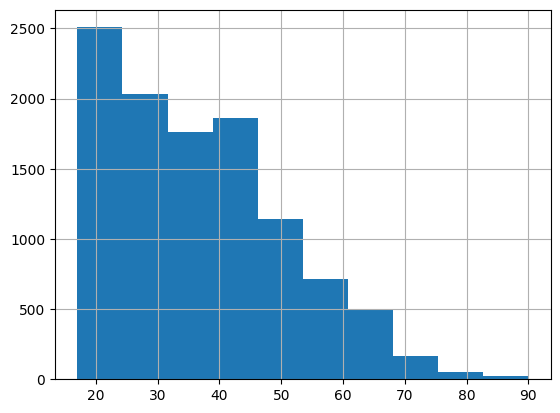

In [103]:
# the hist is also positively skewed
females.age.hist(density=0, histtype="stepfilled", bins=10)

<AxesSubplot:>

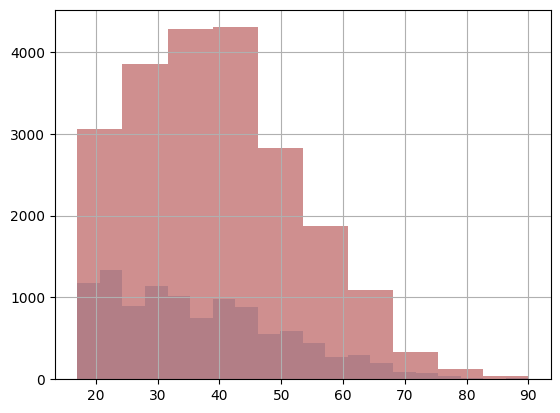

In [104]:
females.age.hist(density=0, histtype="stepfilled", alpha=0.5, bins=20)
males.age.hist(
    density=0,
    histtype="stepfilled",
    alpha=0.75,
    color=sns.desaturate("indianred", 0.75),
    bins=10,
)

<AxesSubplot:>

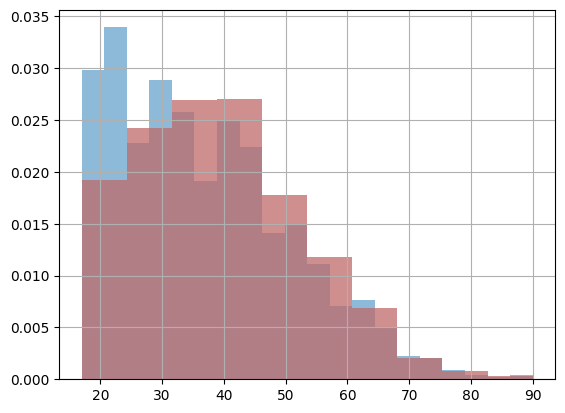

In [105]:
females.age.hist(density=1, histtype="stepfilled", alpha=0.5, bins=20)
males.age.hist(
    density=1,
    histtype="stepfilled",
    alpha=0.75,
    color=sns.desaturate("indianred", 0.75),
    bins=10,
)

<AxesSubplot:>

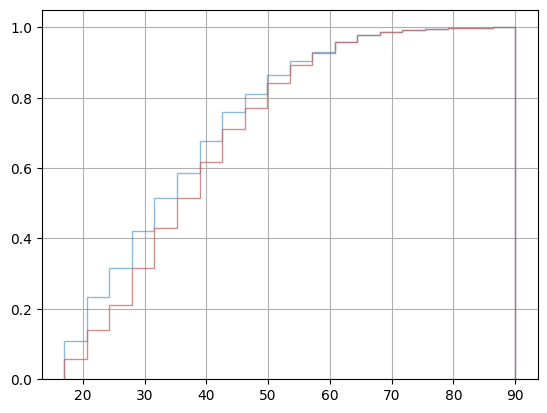

In [106]:
females.age.hist(density=1, histtype="step", cumulative=True, alpha=0.5, bins=20)
males.age.hist(
    density=1,
    histtype="step",
    cumulative=True,
    alpha=0.75,
    color=sns.desaturate("indianred", 0.75),
    bins=20,
)

## Outlier treatment

In [107]:
age_upper_bound = df.age < df.age.median() + 35
age_lower_bound = df.age > df.age.median() - 15

df2 = df.drop(df[~(h_income_mask & age_lower_bound & age_upper_bound)].index)

In [108]:
h_income_males_2 = h_income_males.drop(
    h_income_males[
        (
            (h_income_males.age > df.age.median() + 35)
            & (h_income_males.age > df.age.median() - 15)
        )
    ].index
)

h_income_females_2 = h_income_females.drop(
    h_income_females[
        (
            (h_income_females.age > df.age.median() + 35)
            & (h_income_females.age > df.age.median() - 15)
        )
    ].index
)

In [109]:
male_mu, male_median, male_std = (
    h_income_males_2.age.mean(),
    h_income_males_2.age.median(),
    h_income_males_2.age.std(),
)
female_mu, female_median, female_std = (
    h_income_females_2.age.mean(),
    h_income_females_2.age.median(),
    h_income_females_2.age.std(),
)

print(
    "Statistics of age for men:\n",
    f"mu: {male_mu}\n",
    f"std: {male_std}\n",
    f"median: {male_median}\n",
    f"min: {h_income_males_2.age.min()}\n",
    f"max: {h_income_males_2.age.max()}\n",
)
print(
    "Statistics of age for women:\n",
    f"mu: {female_mu}\n",
    f"std: {female_std}\n",
    f"median: {female_median}\n",
    f"min: {h_income_females_2.age.min()}\n",
    f"max: {h_income_females_2.age.max()}\n",
)

Statistics of age for men:
 mu: 44.317982123920615
 std: 10.019749857171409
 median: 44.0
 min: 19
 max: 72

Statistics of age for women:
 mu: 41.877028181041844
 std: 10.036441807343707
 median: 41.0
 min: 19
 max: 72



<AxesSubplot:>

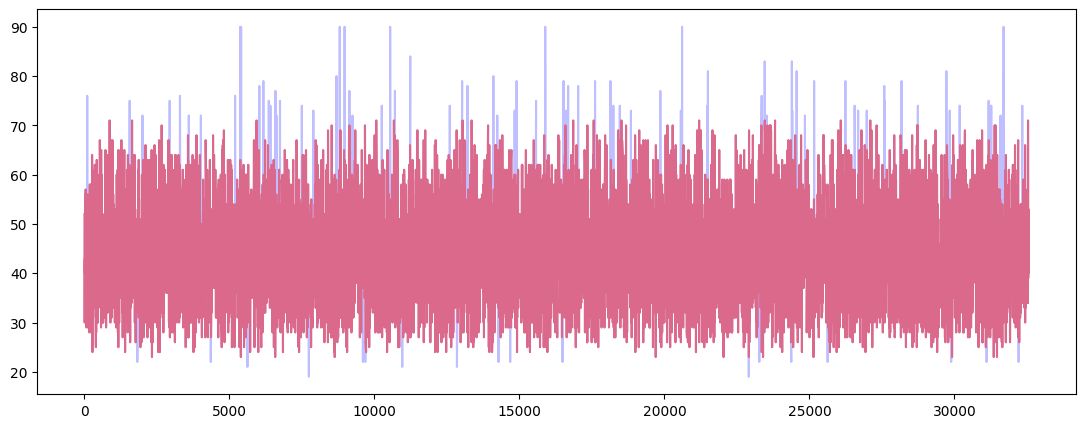

In [110]:
plt.figure(figsize=(13.4, 5))
df.age[(df.income == ">50K")].plot(alpha=0.25, color="blue")
df2.age[(df2.income == ">50K")].plot(alpha=0.45, color="red")

In [111]:
print(
    f"The mean difference with outliers is: {(males.age.mean() - females.age.mean()):.2f}"
)
print(
    f"The mean difference with outliers is: {(h_income_males_2.age.mean() - h_income_females_2.age.mean()):.2f}"
)

The mean difference with outliers is: 2.58
The mean difference with outliers is: 2.44


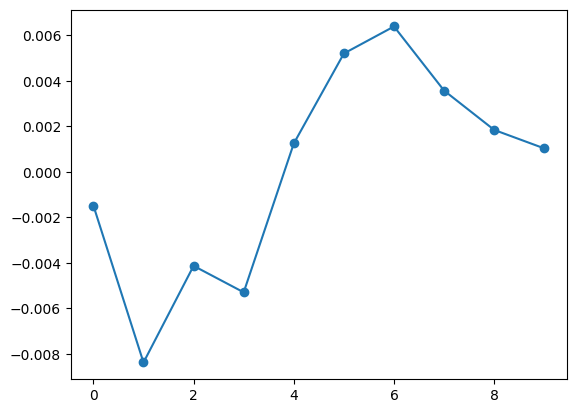

In [112]:
countx, divisionx = np.histogram(h_income_males_2.age, density=True)
county, divisiony = np.histogram(h_income_females_2.age, density=True)

val = [(divisionx[i], divisionx[i + 1] / 2) for i in range(len(divisionx) - 1)]
plt.plot(countx - county, "o-")

In [113]:
def skewness(x):
    res = 0
    m = x.mean()
    s = x.std()

    for i in x:
        res += (i - m) * (i - m) * (i - m)
    res /= len(x) * s * s * s
    return res


print(f"Skewness of male population = {skewness(h_income_males_2.age)}")
print(f"Skewness of male population = {skewness(h_income_females_2.age)}")

Skewness of male population = 0.26644438384328223
Skewness of male population = 0.3863335249128606


In [114]:
def pearson(x):
    return 3 * (x.mean() - x.median()) * x.std()


print(f"Pearson's coefficient of male population = {pearson(h_income_males_2.age)}")
print(f"Pearson's coefficient of male population = {pearson(h_income_females_2.age)}")

Pearson's coefficient of male population = 9.558304022209926
Pearson's coefficient of male population = 26.406726907280902


## Kernel density

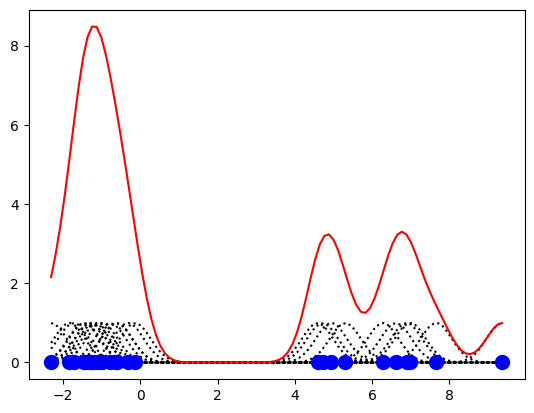

In [115]:
x1 = np.random.normal(-1, 0.5, 15)
x2 = np.random.normal(6, 1, 10)
y = np.r_[x1, x2]
x = np.linspace(min(y), max(y), 100)
s = 0.4
kernels = np.transpose([stats.norm.pdf(x, yi, s) for yi in y])
plt.plot(x, kernels, "k:")
plt.plot(x, kernels.sum(1), "r")
plt.plot(y, np.zeros(len(y)), "bo", ms=10)

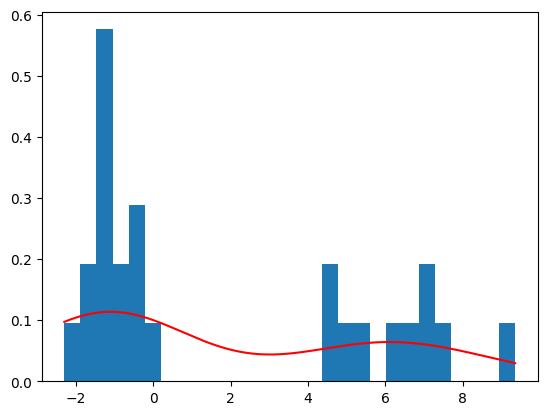

In [116]:
density = stats.gaussian_kde(y)
xgrid = np.linspace(x.min(), x.max(), 200)
plt.hist(y, bins=28, density=True)
plt.plot(xgrid, density(xgrid), "r-")

In [117]:
NTs = 200
mu = 0.0
var = 1.0
err = 0.0
NPs = 1000
for i in range(NTs):
    x = np.random.normal(mu, var, NPs)
    err += (x.mean() - mu) ** 2
print(" MSE : ", err / NTs)

 MSE :  0.0011414509852669867


In [118]:
data = pd.read_csv("data/ACCIDENTS_GU_BCN_2013.csv", encoding="ISO-8859-1")

In [120]:
data["Date"] = data["Mes de any"].astype(str) + "-" + data["Dia de mes"].astype(str)
data["Date"] = pd.to_datetime(data["Date"], format="%m-%d")
data["Date"] = data["Date"].dt.strftime("%m-%d")

In [121]:
data[["Date"]].head()

,Date
0,10-16
1,10-29
2,07-23
3,02-26
4,11-18


In [122]:
accidents = data.groupby(["Date"]).size()
print("Mean:", round(accidents.mean(), 4))

Mean: 25.9096


In [123]:
df = accidents.to_frame()
N_test = 10000
elements = 200
# mean array of samples
means = [0] * N_test
# sample g enera tion
for i in range(N_test):
    rows = np.random.choice(df.index.values, elements)
    sampled_df = df.loc[rows]
    means[i] = sampled_df.mean()

In [124]:
rows = np.random.choice(df.index.values, 200)
sampled_df = df.loc[rows]
est_sigma_mean = sampled_df.std() / math.sqrt(200)
print("Direct estimation of SE from one sample of 200 elements:", est_sigma_mean[0])
print(
    "Estimation of the SE by simulating 10000 samples of 200 elements:",
    np.array(means).std(),
)

Direct estimation of SE from one sample of 200 elements: 0.6222830392229267
Estimation of the SE by simulating 10000 samples of 200 elements: 0.6418789043106183


In [125]:
def meanBootstrap(X, numberb):
    x = [0] * numberb
    for i in range(numberb):
        sample = [X[j] for j in np.random.randint(len(X), size=len(X))]
        x[i] = np.mean(sample)
    return x


m = meanBootstrap(accidents, 10000)
print("Mean estimate :", np.mean(m))

Mean estimate : 25.916336164383562


In [126]:
m = accidents.mean()
se = accidents.std() / math.sqrt(len(accidents))
ci = [m - se * 1.96, m + se * 1.96]
print("Confidence interval:", ci)

Confidence interval: [24.975156065800284, 26.8440220163915]


In [127]:
m = meanBootstrap(accidents, 10000)
sample_mean = np.mean(m)
sample_se = np.std(m)
print("Mean estimate:", sample_mean)
print("SE of the estimate:", sample_se)
ci = [np.percentile(m, 2.5), np.percentile(m, 97.5)]
print("Confidence interval:", ci)

Mean estimate: 25.908071780821917
SE of the estimate: 0.47268469176734274
Confidence interval: [24.983493150684932, 26.843835616438355]


In [129]:
data = pd.read_csv("data/ACCIDENTS_GU_BCN_2010.csv", encoding="latin -1")

# Create a new column which is the date
data["Date"] = (
    data["Dia de mes"].apply(lambda x: str(x))
    + "-"
    + data["Mes de any"].apply(lambda x: str(x))
)
data2 = data["Date"]
counts2010 = data["Date"].value_counts()
print("2010: Mean", counts2010.mean())

data = pd.read_csv("data/ACCIDENTS_GU_BCN_2013.csv", encoding="ISO-8859-1")

# Create a new column which is the date
data["Date"] = (
    data["Dia de mes"].apply(lambda x: str(x))
    + "-"
    + data["Mes de any"].apply(lambda x: str(x))
)
data2 = data["Date"]
counts2013 = data["Date"].value_counts()
print("2013: Mean", counts2013.mean())

2010: Mean 24.81095890410959
2013: Mean 25.90958904109589


In [130]:
n = len(counts2013)
mean = counts2013.mean()
s = counts2013.std()
ci = [mean - s * 1.96 / np.sqrt(n), mean + s * 1.96 / np.sqrt(n)]
print("2010 accident rate estimate:", counts2010.mean())
print("2013 accident rate estimate:", counts2013.mean())
print("CI for 2013: ", ci)

2010 accident rate estimate: 24.81095890410959
2013 accident rate estimate: 25.90958904109589
CI for 2013:  [24.975156065800284, 26.8440220163915]


In [131]:
m = len(counts2010)
n = len(counts2013)
p = counts2013.mean() - counts2010.mean()
print("m:", m, "n:", n)
print("meandifference:", p)

m: 365 n: 365
meandifference: 1.0986301369863014


In [135]:
#pooling distributions
x = counts2010
y = counts2013
pool = np.concatenate([x, y])
np.random.shuffle(pool)

# sample generation
N = 10000  # number of samples
diff = np.zeros(N)
for i in range(N):
    p1 = [random.choice(pool) for _ in range(n)]
    p2 = [random.choice(pool) for _ in range(n)]
    diff[i] = np.mean(p1) - np.mean(p2)

In [136]:
# counting di ffere nces larger than the observed one
diff2 = np . array ( diff )
w1 = np . where ( diff2 > p) [ 0 ]

print("p-value (Simulation) =", len(w1) / float(N), f"{len(w1) /float(N) * 100}%", "Difference =", p)

if (len(w1)/float(N) ) < 0.05:
    print("The effect is likely")
else:
    print("The effect is not likely")

p-value (Simulation) = 0.0455 4.55% Difference = 1.0986301369863014
The effect is likely
